In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Get dat set

In [2]:
# set data
from torchvision import datasets

train_data=datasets.FashionMNIST(root='data',
                                 train=True,
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None)
test_data=datasets.FashionMNIST(root='data',
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 11820642.62it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 198856.42it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3774116.75it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13957515.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
  # see traing sample
  image,label=train_data[0]
  image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check shape
image.shape,label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

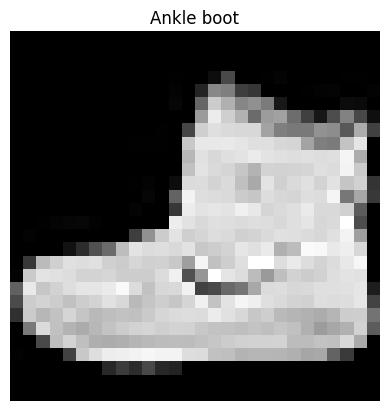

In [8]:
# visual
import matplotlib.pyplot as plt
image,label=train_data[0]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

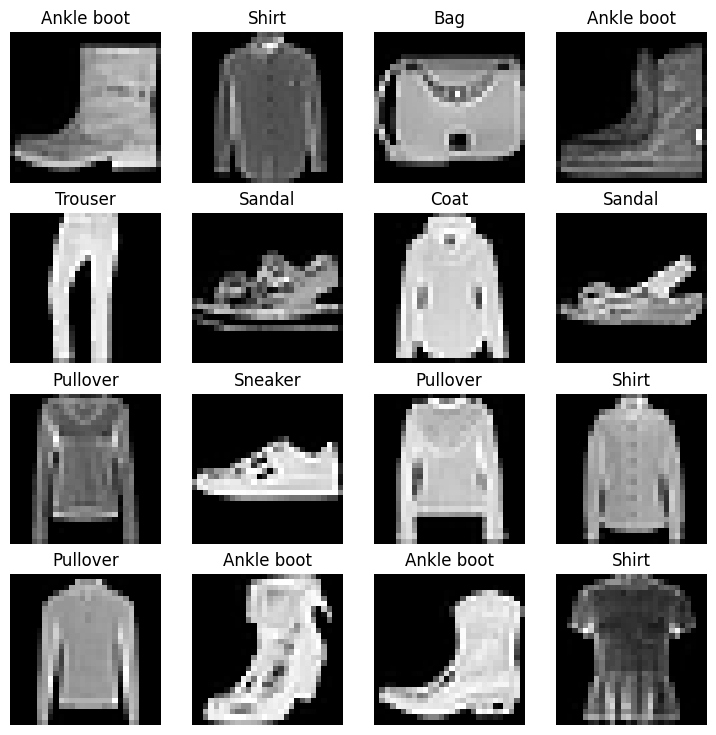

In [9]:
# plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range (1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [10]:
#prepare dataloader
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [11]:
# check what inside training dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

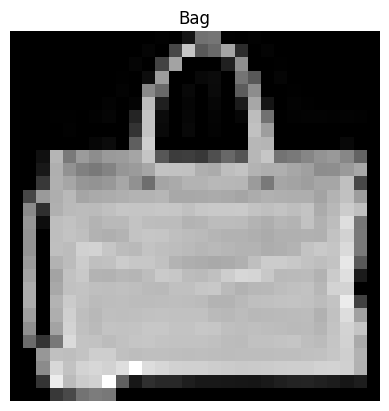

In [12]:
# show a sample
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

# Build model

In [13]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

model_0=FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=len(class_names))
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
# Loss function/Optimizer/Accuracy/Timer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

from timeit import default_timer  as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  return total_time

In [15]:
# import progress bar & set timer
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

# set epoch
epochs=3

# create training & testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n----")
  train_loss=0

  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print
    if batch%400==0:
      print(f"Looked at{batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  # average loss
  train_loss/=len(train_dataloader)

  ## Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    #average loss/acc
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  #print
  print(f"\n Train loss:{train_loss:.4f}|Test loss:{test_loss:.4f}|Test acc:{test_acc:.4f}")

#Calculate traing time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device='cpu')
total_train_time_model_0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss:0.5936|Test loss:0.5081|Test acc:82.2484
Epoch:1
----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss:0.4760|Test loss:0.4827|Test acc:82.9872
Epoch:2
----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train loss:0.4545|Test loss:0.4790|Test acc:83.4764


39.08355098199999

In [16]:
# make prediction and get model_0 results
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {'model_name':model.__class__.__name__,
          'model_loss':loss.item(),
          'model_acc':acc}
# calculate model_0 results on test dataset
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47896066308021545,
 'model_acc': 83.47643769968052}

# Build a Convolutional neural network (CNN)

In [17]:
# create model
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    #print(f"Shape after block 1:{x.shape}")#
    x= self.conv_block_2(x)
    #print(f"Shape after block 2:{x.shape}")#
    x= self.classifier(x)
    #print (f"Output shape:{x.shape}")#
    return x


In [18]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names))

In [19]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [20]:
rand_image_tensor=torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [21]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [22]:
# Accuracy,loss function & optimizer
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [23]:
# training & testing loop
def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device):
  train_loss,train_acc=0,0
  model.train()
  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss}|Train acc:{train_acc}")

def test_step(model,data_loader,loss_fn,accuracy_fn,device):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)

      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss:{test_loss}| Test acc:{test_acc}")




In [24]:
from tqdm.auto import tqdm
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device='cpu')
  test_step(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device='cpu')

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device='cpu')
total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Train loss:0.5951793193817139|Train acc:78.375
Test loss:0.3950044810771942| Test acc:85.99241214057508
Epoch:1
Train loss:0.3653560280799866|Train acc:86.90166666666667
Test loss:0.35244327783584595| Test acc:86.91094249201278
Epoch:2
Train loss:0.3258754312992096|Train acc:88.12833333333333
Test loss:0.32718968391418457| Test acc:88.06908945686901


160.517730486

In [25]:
# get results
model_2_results=eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

# Compare 2 models

In [26]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.478961,83.476438
1,FashionMNISTModelV2,0.327190,88.069089


In [27]:
# add time col
compare_results['Training time']=[total_train_time_model_0,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,Training time
0,FashionMNISTModelV0,0.478961,83.476438,39.083551
1,FashionMNISTModelV2,0.327190,88.069089,160.517730


Text(0, 0.5, 'model')

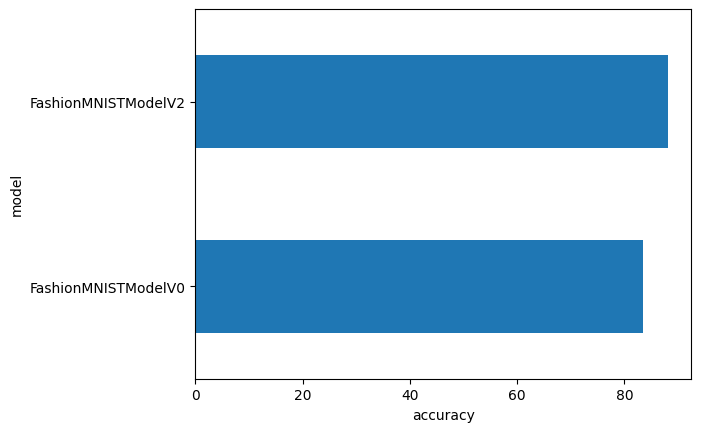

In [28]:
# visual
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy')
plt.ylabel('model')

In [29]:
# Make & evaluate random predictions
def make_predictions(model,data,device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Sandal')

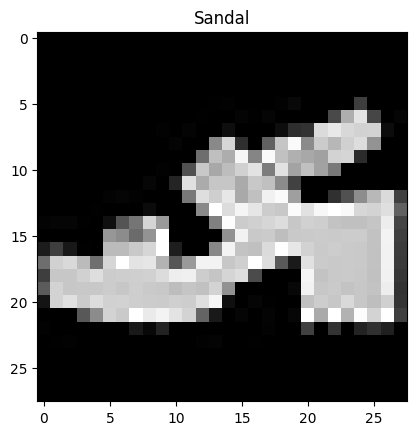

In [30]:
# view original random sample
import random 
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [31]:
# Check simple prediction

pred_probs=make_predictions(model=model_2,data=test_samples,device='cpu')

pred_classes=pred_probs.argmax(dim=1)

pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [32]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

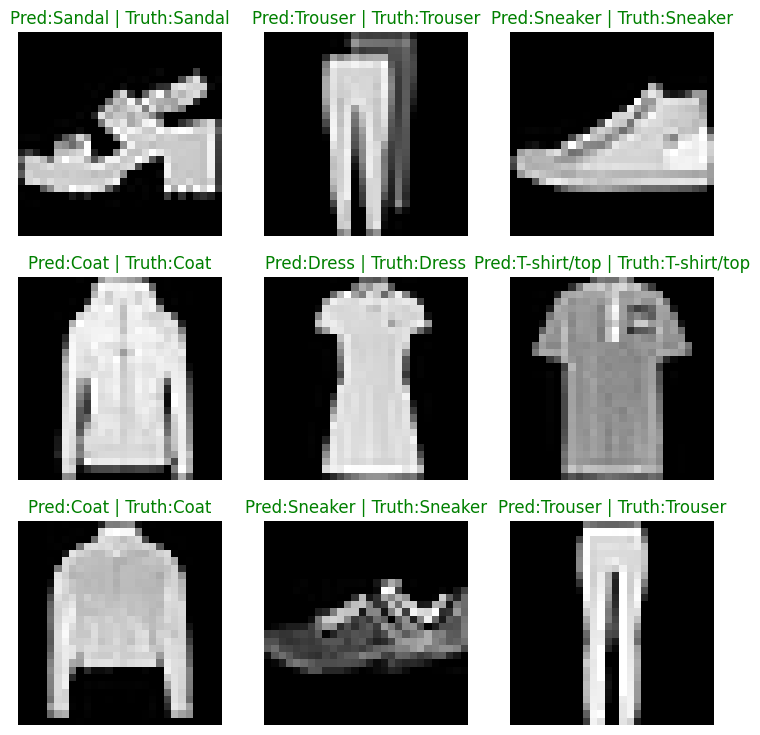

In [33]:
# plot prediction
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')

  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,c='g')
  else:
    plt.title(title_text,c='r')
  plt.axis(False)

# Make predictions with confusion matrix

In [39]:
from tqdm.auto import tqdm

y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm (test_dataloader,desc='Making predictions...'):
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [40]:
len(y_pred_tensor)

10000

In [42]:
# import for confusion matrix
try:
  import torchmetrics,mlxtend
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics,mlxtend

In [43]:
mlxtend.__version__

'0.22.0'

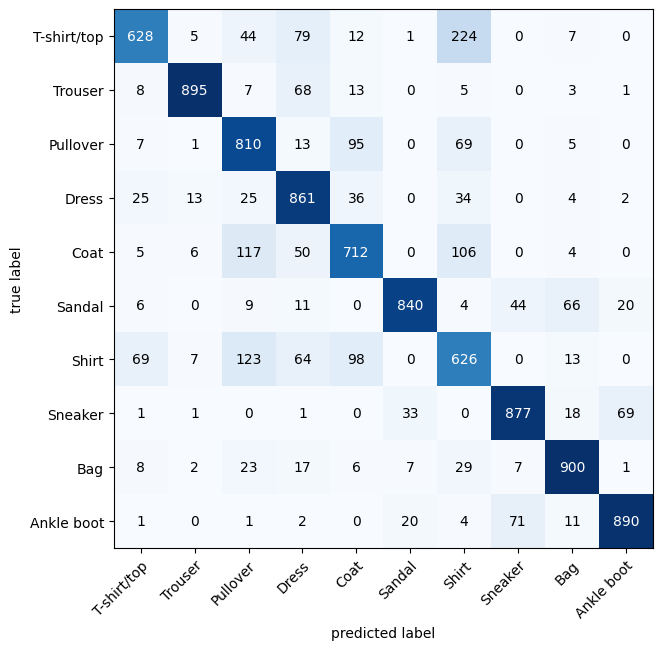

In [45]:
# plot confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)

fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                             class_names=class_names,
                             figsize=(10,7))

In [48]:
# Save & load
from pathlib import  Path

MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME='Computervision_model_2.pth'
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


In [50]:
#create new instance
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [52]:
#evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  )
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [53]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [54]:
# check if result is close
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02)

tensor(True)